In [55]:
# Imports
import json
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import community as community_louvain
import pandas as pd

In [56]:
# ---------------------------
# DATASET
# ---------------------------

df = pd.read_csv("data/edges.csv")
print(df.head())

agencies = df["source"].unique()
reports = df["target"].unique()

with open("data/filtered_organisations_with_types.json", "r", encoding="utf-8") as f:
    roles_data = json.load(f)

   source   target
0    1979  3105338
1    1212  3105338
2    1051  3105338
3    3594  3105113
4    2591  3105113


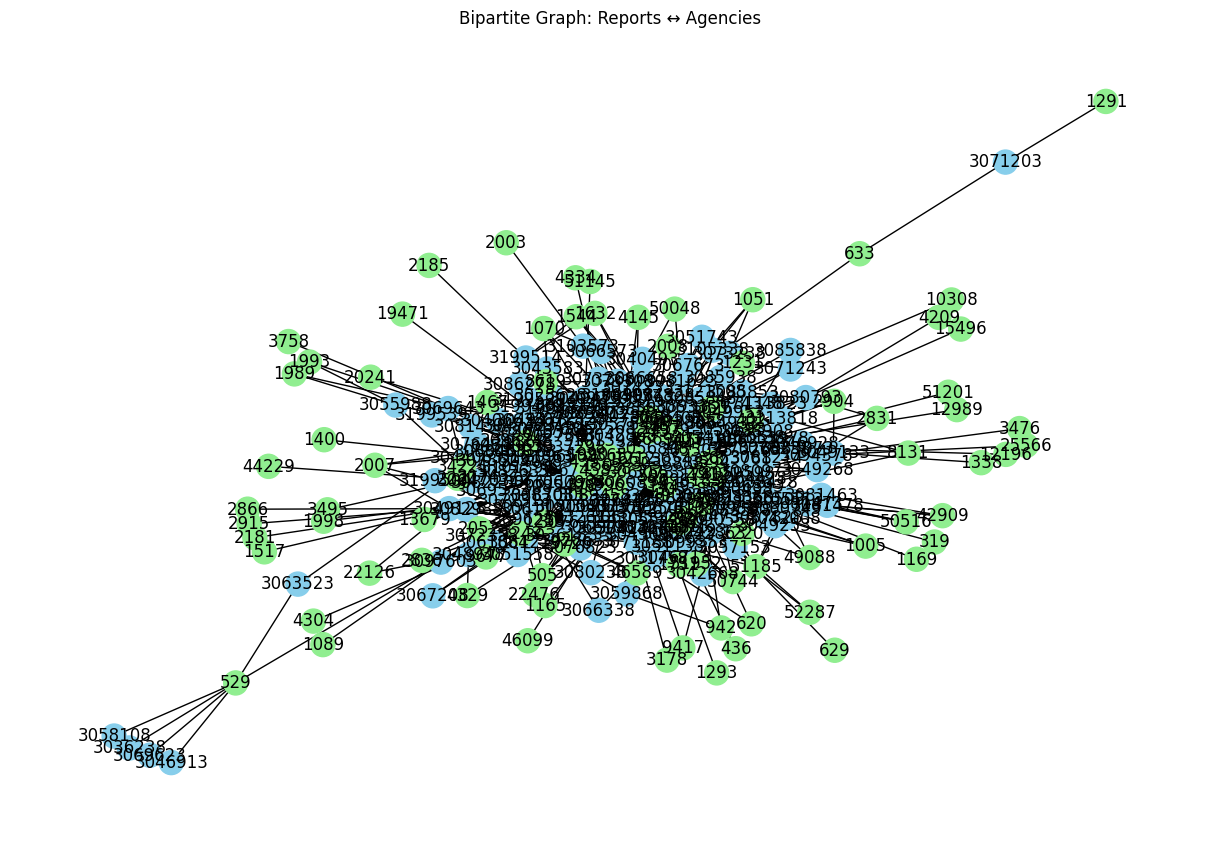

In [57]:
# ---------------------------
# Part 4: Bipartite Graph Creation
# ---------------------------

# Create bipartite graph
B = nx.Graph()

# Add edges from DataFrame
B.add_nodes_from(reports, bipartite=0)  # Set 0: Reports
B.add_nodes_from(agencies, bipartite=1)  # Set 1: Agencies
B.add_edges_from(df.values)

# Visualize bipartite graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(B, seed=42)
colors = ["skyblue" if node in reports else "lightgreen" for node in B.nodes()]
nx.draw(B, pos, with_labels=True, node_color=colors)
plt.title("Bipartite Graph: Reports ↔ Agencies")
plt.show()

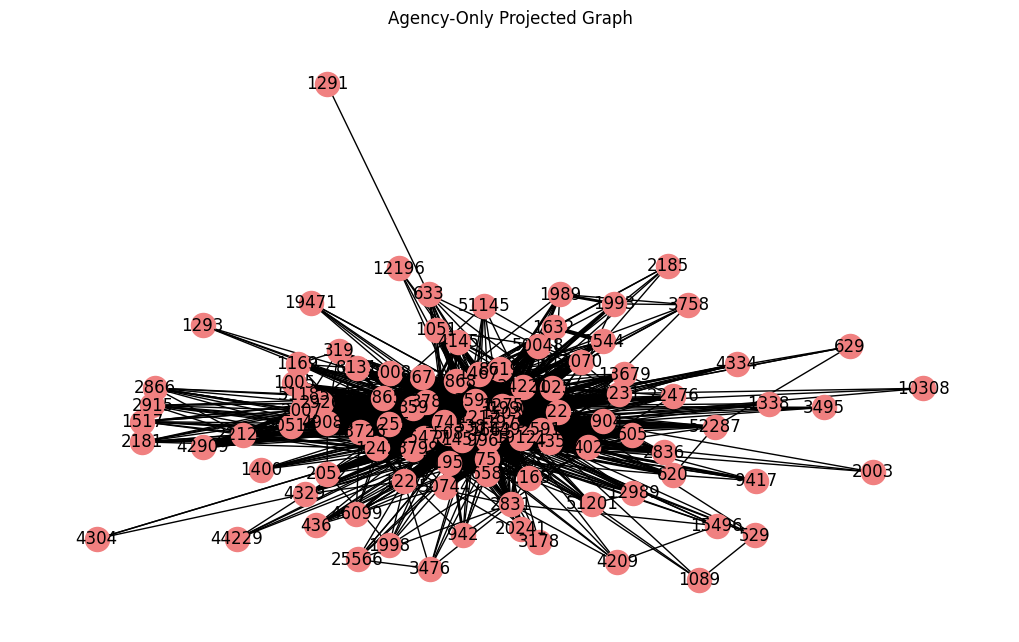

In [58]:
# ---------------------------
# Part 5: Projected Agency Graph
# ---------------------------

# Project to agency-only graph
agency_proj = bipartite.weighted_projected_graph(B, agencies)

# Visualize weighted agency graph
plt.figure(figsize=(10, 6))
edge_weights = [agency_proj[u][v]["weight"] for u, v in agency_proj.edges()]
pos = nx.spring_layout(agency_proj)
nx.draw(agency_proj, with_labels=True, width=edge_weights, node_color="lightcoral")
# Layout spring

plt.title("Agency-Only Projected Graph")
plt.show()


{'52287': {'name': 'International Search and Rescue Advisory Group', 'shortname': 'INSARAG', 'type': {'id': 272, 'name': 'International Organization'}}, '51952': {'name': 'Fact Foundation', 'shortname': 'FACT', 'type': {'id': 270, 'name': 'Academic and Research Institution'}}, '51449': {'name': 'The Humanitarian', 'shortname': 'The Humanitarian', 'type': {'id': 275, 'name': 'Other'}}, '51201': {'name': 'Centre for Sustainable Peace and Democratic Development', 'shortname': 'SeeD', 'type': {'id': 270, 'name': 'Academic and Research Institution'}}, '51185': {'name': 'VOICE', 'shortname': 'VOICE', 'type': {'id': 274, 'name': 'Non-governmental Organization'}}, '51145': {'name': 'Aid Gate Organization', 'shortname': 'AGO', 'type': {'id': 274, 'name': 'Non-governmental Organization'}}, '50744': {'name': 'Global Response Medicine', 'shortname': 'GRM', 'type': {'id': 274, 'name': 'Non-governmental Organization'}}, '50516': {'name': 'LINKS', 'shortname': 'LINKS', 'type': {'id': 274, 'name': 'No

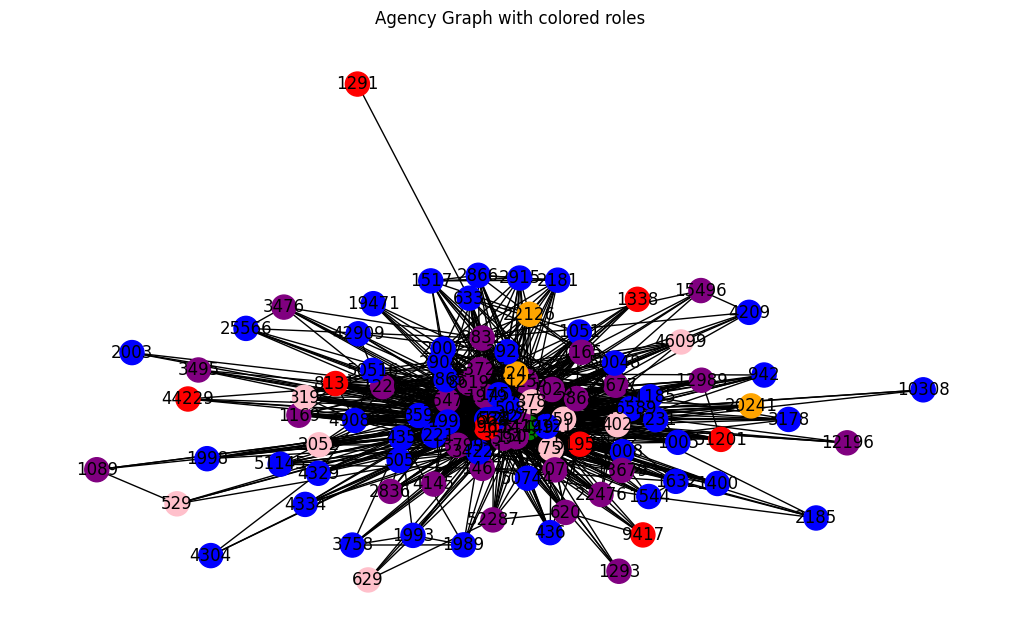

In [59]:
# ---------------------------
# Assortativity
# ---------------------------

print(roles_data)
# Iterate nodes
for node in agency_proj.nodes():
    agency_proj.nodes()[node]["role"] = roles_data.get(str(node), {}).get("type", {}).get("name", "Unknown")

# Check for missing roles
missing_roles = [n for n in agency_proj.nodes() if "role" not in agency_proj.nodes[n]]
if missing_roles:
    print("Warning: These agencies have no assigned role:", missing_roles)
    print(len(missing_roles), "agencies have no assigned role.")


# Unique roles 
unique_roles = set(agency_proj.nodes[n]["role"] for n in agency_proj.nodes())
print("Unique roles:", unique_roles)
# Create role-color mapping 
# 6 unique roles 

role_colors = [
    "blue", 
    "red",
    "green",
    "purple",
    "orange",
    "pink",
]

role_color_map = {role: color for role, color in zip(unique_roles, role_colors)}
# Assign colors to nodes based on roles 
for node in agency_proj.nodes():
    role = agency_proj.nodes()[node]["role"]
    agency_proj.nodes()[node]["color"] = role_color_map.get(role, "gray")  # Default to gray if role not found

# Visualize agency graph with roles
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(agency_proj)
colors = [agency_proj.nodes()[node]["color"] for node in agency_proj.nodes()]
nx.draw(agency_proj, pos, with_labels=True, node_color=colors)
plt.title("Agency Graph with colored roles")
plt.show()

In [60]:

# ---------------------------
# Part 7: Centrality Measures
# ---------------------------
degree_centrality = nx.degree_centrality(agency_proj)
betweenness_centrality = nx.betweenness_centrality(agency_proj)
closeness_centrality = nx.closeness_centrality(agency_proj)
eigenvector_centrality = nx.eigenvector_centrality(agency_proj)

# Display top agencies by centrality
print("\n--- Centrality Measures ---")
print("Top 5 by Degree Centrality:") 
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
for agency, centrality in top_degree:
    print(f"{agency}: {centrality:.4f}")
print("\nTop 5 by Betweenness Centrality:")
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
for agency, centrality in top_betweenness:
    print(f"{agency}: {centrality:.4f}")
print("\nTop 5 by Closeness Centrality:")
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
for agency, centrality in top_closeness:
    print(f"{agency}: {centrality:.4f}")
print("\nTop 5 by Eigenvector Centrality:")
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
for agency, centrality in top_eigenvector:
    print(f"{agency}: {centrality:.4f}")


# TODO: Visualize top-ranking agencies or summarize findings in a table. Highlight which agencies serve as bridges or hubs in the network


--- Centrality Measures ---
Top 5 by Degree Centrality:
1212: 0.8365
538: 0.8077
508: 0.7885
1663: 0.7115
1275: 0.6442

Top 5 by Betweenness Centrality:
1212: 0.1292
538: 0.1112
508: 0.1020
1663: 0.0836
1275: 0.0618

Top 5 by Closeness Centrality:
1212: 0.8595
538: 0.8387
508: 0.8254
1663: 0.7761
1275: 0.7376

Top 5 by Eigenvector Centrality:
1212: 0.2272
538: 0.2261
508: 0.2249
1663: 0.2031
1741: 0.2013


In [61]:
# ---------------------------
# Part 8: Role Assortativity
# ---------------------------
assortativity = nx.attribute_assortativity_coefficient(agency_proj, "role")
print(f"\nRole Assortativity Coefficient: {assortativity:.3f}")


Role Assortativity Coefficient: 0.007



Number of communities detected: 6


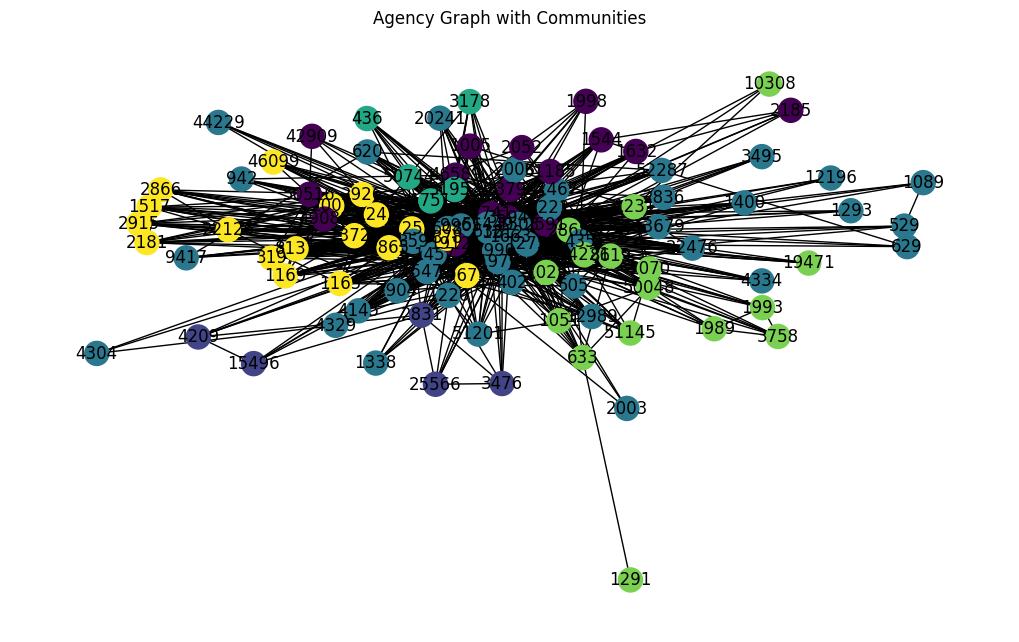

In [62]:
# ---------------------------
# Part 9: Community Detection (Greedy modular)
# ---------------------------

c = nx.algorithms.community.louvain_communities(agency_proj)
print(f"\nNumber of communities detected: {len(c)}")
# Color communities 
community_colors = [plt.cm.tab20(i) for i in range(len(c))]
# Create a mapping from node to community
node_to_community = {}
for i, community in enumerate(c):
    for node in community:
        node_to_community[node] = i
# Assign colors to nodes based on community
for node in agency_proj.nodes():
    agency_proj.nodes()[node]["community"] = node_to_community[node]
# Visualize communities with each being clearly seperated
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(agency_proj)
colors = [agency_proj.nodes()[node]["community"] for node in agency_proj.nodes()]
nx.draw(agency_proj, pos, with_labels=True, node_color=colors)
plt.title("Agency Graph with Communities")
plt.show()
